# Supervised Learning - Metrics avaliation

Alunos: 

        Leticia Bossatto Marchezi        | RA: 791003

        Luís Augusto Simas do Nascimento | RA: 790828

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder

# Dataset
Escolheu-se o dataset entitulado "Bank Marketing Data Set", disponível em: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

O problema é referente a campanhas publicitárias realizadas por um banco Português, possuindo dados de seus clientes e tendo como output se o cliente contratou ou não um investimento de renda fixa.


Há 4 variações de datasets e o escolhido foi o arquivo bank-full.csv, pois há uma maior quantidade de exemplos.


O dataset em questão conta com 16 atributos, distribuídos entre numéricos, nominais e ordinais, além da classe de interesse (output) que é binário, podendo assumir os valores "yes" e "no"(positivo ou negativo). Ou seja, é uma tarefa de classificação com duas classes.



Como o dataset foi disponibilizado de forma compactada(em um arquivo .zip) no site original, o arquivo foi baixado e transferido para o Google Drive sem alguma modificação, possibilitando a aquisição direta pela biblioteca Pandas.

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1KBqD3xgLobqYBsiCdYSf8DkP2QaS9X3W"
df = pd.read_csv(url, delimiter=";")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Contando a ocorrência de dados de cada classe
Há um desbalanceamento entre as classes, apresentando amostras na proporção de 1-7,5 da classe positiva para a classe negativa.


In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

## One hot encoding
Como o dataframe possui atributos nominais, foi necessária a aplicação da técnica One Hot Encoding, responsável por transformar as colunas nominais em atributos binários, gerando uma nova coluna para cada valor existente do atributo.

As colunas com valores nominais, como verificado abaixo, são:
'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month' e 'poutcome'.

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 

A função get_dummies realiza o encoding e gera as novas colunas com o nome da coluna original + underscores + valor do dado.

In [ ]:
df_ohe = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
df_ohe.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
len(df_ohe)

45211

## OverSampling
Uso da técnica Smote para aumentar a quantidade de dados da classe minoritária ("yes"), igualando a quantidade de dados entre as duas classes.

In [ ]:
target = df_ohe["y"]
X = df_ohe.drop(columns="y")

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, target)

In [ ]:
y_res.value_counts()

no     39922
yes    39922
Name: y, dtype: int64

In [ ]:
df_ohe=X_res
df_ohe['y']=y_res

## 10 Fold Cross-Validation

Posteriormente ocorre a separação em 10 conjuntos de dados para aplicar a estratégia de cross-validation, analisando a precisão da predição do modelo na prática.

Para a criação dos folds primeiro definiu-se uma função `kfold`, reponsável por particionar o conjunto de dados `data` em `nfolds` partições aleatórias.


A função kfold gera uma lista que contém as partições do dataframe. Como são 10 folds, a lista contém 10 elementos, ou 10 dataframes.
Para aleatorizar a distribuição dos dados, ocorre um embaralhamento dos índices. Tais índices serão distribuidos em cada iteração do loop, adicionando `número de linhas do dataframe // número de folds + 1 ` dados nos `número de linhas do dataframe % número de folds ` elementos e `número de linhas do dataframe // número de folds ` nas partições restantes.

A função acessa o slice do dataframe e o adiciona ao array de folds.

In [ ]:
def kfold(data, nfolds):
  nrows = len(data)

  # Aleatorizando índices do dataframe
  indexes = np.arange(0, nrows)
  random.shuffle(indexes)

  lower = 0 
  upper = 0 

  folds = []

  # Número de partições que conterão nrows // nfolds + 1 elementos
  threshold = nrows % nfolds
  
  for i in range(nfolds):
    upper += nrows // nfolds + (1 if i < threshold else 0)

    folds.append(data.iloc[indexes[lower:upper]])

    lower = upper

  return folds

In [ ]:
folds = kfold(df_ohe, 10)

Separando o target dos atributos do dataframe.

In [ ]:
y = []
for i in range(10):
  y.append(folds[i].loc[:,"y"])
  folds[i] = folds[i].drop(columns="y")

Definindo datasets para treino e teste, 9 folds para treino e 1 para teste em cada iteração.

In [ ]:
X_train = []
X_test = []
y_train = []
y_test = []
indexes = list(range(10))

for i in range(10):
  frames = [folds[x] for x in indexes if i!=x ]
  target = [y[x] for x in indexes if i!=x ]
  X_train.append(pd.concat(frames))
  y_train.append(pd.concat(target))
  X_test.append(folds[i])
  y_test.append(y[i])

# Algoritmo de indução

Com os dados de treinamento e teste selecionados para cada um dos 10 folds, o processo de treinamento dos modelos consiste em gerar as 10 árvores de decisão a partir do algoritmo de indução utilizando o critério de entropia.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, criterion="entropy")

models = []
y_pred = []

for i in range(10):
  models.append(clf.fit(X_train[i], y_train[i]))
  y_pred.append(clf.predict(X_test[i]))

# Figura da árvore de decisão

A figura da árvore de decisão pode ser observada logo abaixo. Note que, pelo número de atributos do dataset após o processo de one-hot encoding, as árvores de decisão geradas apresentavam muitos níveis, portanto a representação foi limitada para apenas 3 níveis.

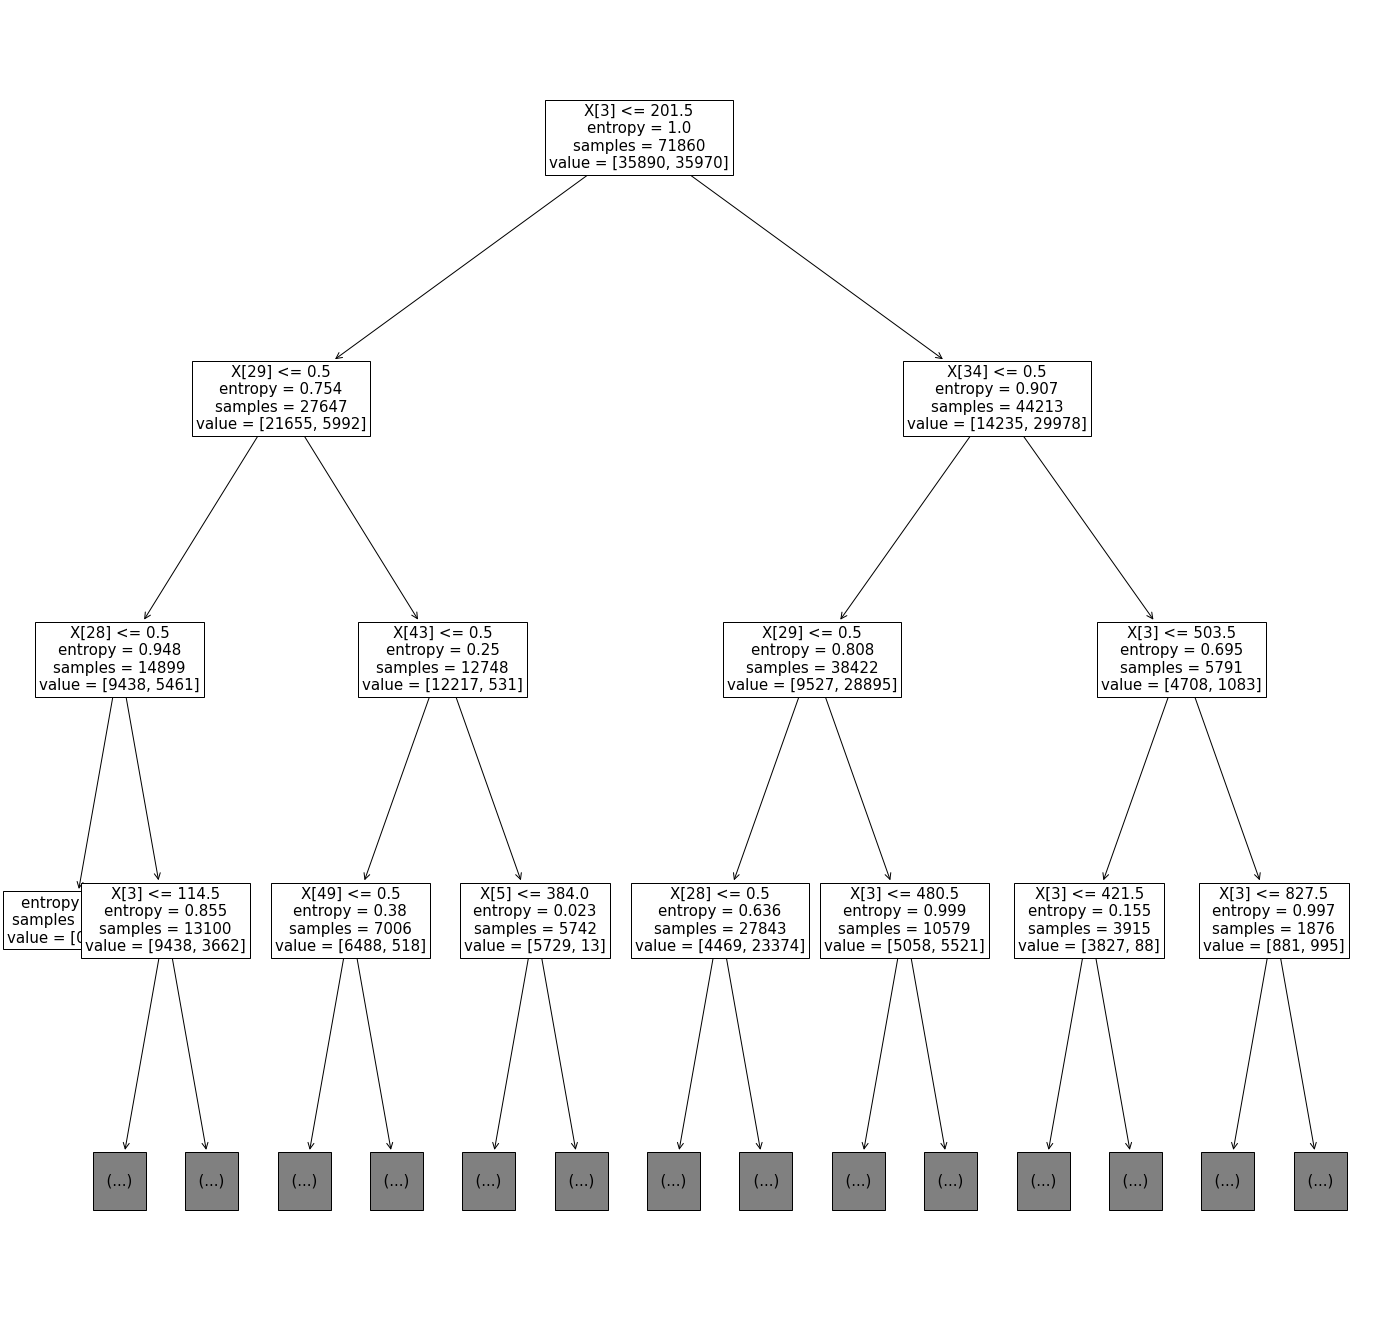

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24,24))
tree.plot_tree(models[0], max_depth=3, fontsize=15)
plt.show()

# Avaliação dos modelos

Com os modelos e suas respectivas previsões, é possível obter as matrizes de confusão e as métricas de avaliação associadas a cada um dos folds.

In [ ]:
from sklearn.metrics import classification_report

As métricas para cada fold são obtidas através da função `classification_report`, que fornece medidas de acurácia, precisão, recall e F1-score.

In [ ]:
target_names = ['no', 'yes']
metrics = []

for i in range(10):
  print("Fold ", i)
  print(classification_report(y_test[i], y_pred[i], target_names=target_names))
  metrics.append(classification_report(y_test[i], y_pred[i], target_names=target_names, output_dict=True))
  print('-----------------------------------------------------')

Fold  0
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      3939
         yes       0.93      0.93      0.93      4046

    accuracy                           0.93      7985
   macro avg       0.93      0.93      0.93      7985
weighted avg       0.93      0.93      0.93      7985

-----------------------------------------------------
Fold  1
              precision    recall  f1-score   support

          no       0.94      0.93      0.93      4036
         yes       0.92      0.94      0.93      3949

    accuracy                           0.93      7985
   macro avg       0.93      0.93      0.93      7985
weighted avg       0.93      0.93      0.93      7985

-----------------------------------------------------
Fold  2
              precision    recall  f1-score   support

          no       0.94      0.93      0.93      4039
         yes       0.93      0.94      0.93      3946

    accuracy                           0.93      7

Da mesma forma, as matrizes de confusão foram obtidas a partir dos valores esperados e os valores preditos por cada modelo.

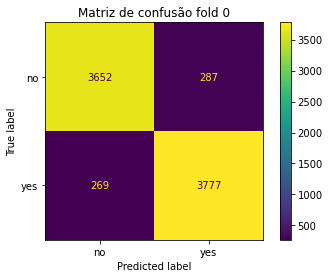

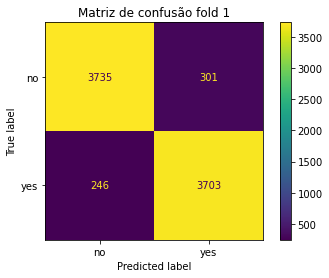

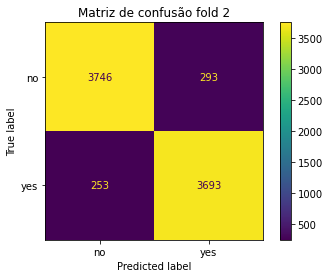

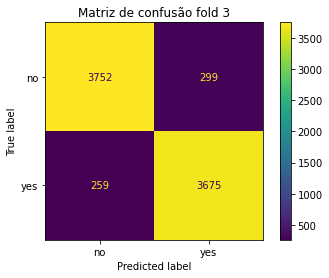

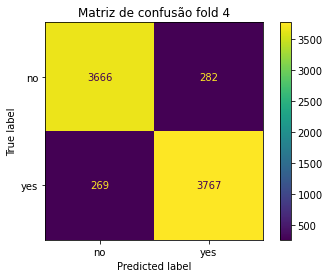

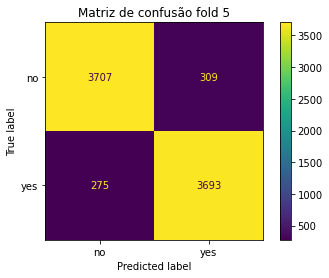

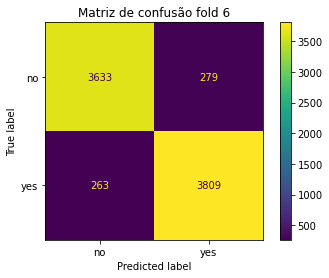

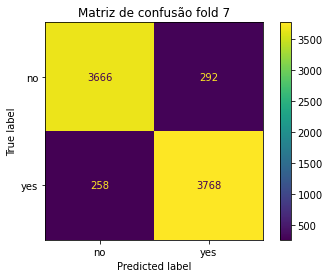

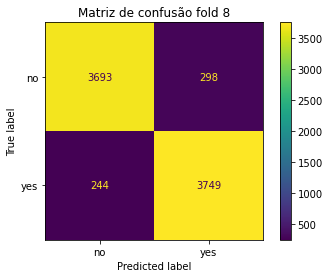

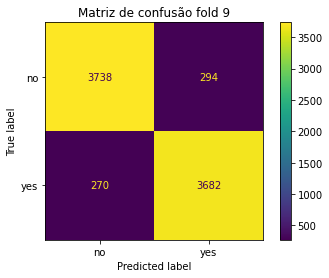

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
for i in range(10):
  disp = ConfusionMatrixDisplay.from_predictions(y_test[i], y_pred[i])
  disp.ax_.set_title("Matriz de confusão fold {}".format(i))  
  plt.show()

## Média e desvio padrão dos resultados
Dadas a métricas coletadas para cada um dos modelos, vamos resumir os dados através da média e do desvio padrão.

In [ ]:
precision = []
recall = []
f1score = []
accuracy = []

for metric in metrics:
  precision.append(metric['weighted avg']['precision'])
  recall.append(metric['weighted avg']['recall'])
  f1score.append(metric['weighted avg']['f1-score'])
  accuracy.append(metric['accuracy'])

metricsdf = pd.DataFrame({'accuracy': accuracy,
                          'precision': precision,
                          'recall': recall,
                          'f1score': f1score})

O sumário das métricas para cada modelo pode ser observado a seguir:

In [ ]:
metricsdf

,accuracy,precision,recall,f1score
0,0.930369,0.930374,0.930369,0.930367
1,0.931497,0.931589,0.931497,0.931498
2,0.931622,0.931673,0.931622,0.931624
3,0.930119,0.930172,0.930119,0.930122
4,0.930987,0.930989,0.930987,0.930986
5,0.926854,0.926888,0.926854,0.926854
6,0.932114,0.932116,0.932114,0.932111
7,0.931112,0.931139,0.931112,0.931108
8,0.932114,0.932193,0.932114,0.932111
9,0.929359,0.929378,0.929359,0.929360


Calculando a média para cada uma das métricas obtem-se o seguinte resultado:

In [ ]:
metricsdf.mean()

accuracy     0.930615
precision    0.930651
recall       0.930615
f1score      0.930614
dtype: float64

Ao obter o desvio padrão para cada métrica observa-se que a variação das métricas para cada fold é relativamente baixa, o que pode indicar uma consistência no desempenho dos modelos obtidos para cada um dos 10 folds.

In [ ]:
metricsdf.std()

accuracy     0.001588
precision    0.001594
recall       0.001588
f1score      0.001587
dtype: float64